# Extended figure 2b

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sys.path.append('./')
sys.path.append('../..') 
sys.path.append('../../main/Fig1') 
from consensus_variables import * 
from plot_f1 import *

In [4]:
# paths
data_dir = "data"
figures_dir = "plots/"

# files
samples_lawson_file = os.path.join(data_dir, "lawson_et_al_data/Lawson_bladder_processed_muts.csv")
mutation_counts_lawson_file = os.path.join(data_dir, "lawson_et_al_data/Lawson_bladder_mutation_matrix.tsv")
hdp_res_file = os.path.join(deepcsa_run_dir, "signatures_hdp/input/samples_matrix.all.hdp.csv")

In [5]:
# select wgs samples
samples_lawson = pd.read_csv(samples_lawson_file, sep = ",")
display(samples_lawson)
genomes_lawson = samples_lawson.loc[samples_lawson["type"] == "wgs"]["sampleID"].unique().tolist()
print(len(genomes_lawson))
genomes_lawson

,sampleID,chr,pos,ref,alt,type
0,T01_25F_b04_lo0010,1,4218296,T,A,wgs
1,T01_25F_b04_lo0010,1,8236351,C,T,wgs
2,T01_25F_b04_lo0010,1,12286140,A,G,wgs
3,T01_25F_b04_lo0010,1,28121171,T,C,wgs
4,T01_25F_b04_lo0010,1,30764509,T,C,wgs
...,...,...,...,...,...,...
290184,C05_75M_b10_lo0029,7,105280097,A,G,exome
290185,C05_75M_b10_lo0029,7,120935492,A,T,exome
290186,C05_75M_b10_lo0029,7,123593740,G,A,exome
290187,C05_75M_b10_lo0029,9,8471257,C,T,exome


88


['T01_25F_b04_lo0010',
 'T01_25F_b04_lo0022',
 'T02_35F_b05_lo0015',
 'T02_35F_b05_lo0045',
 'T03_53F_b08_lo0056',
 'T03_53F_b08_lo0067',
 'T03_53F_b08_lo0076',
 'T03_53F_b08_lo0111',
 'T03_53F_b08_lo0122',
 'T04_55M_b01_lo0006',
 'T04_55M_b05_lo0010',
 'T04_55M_b05_lo0014',
 'T05_58M_b01_lo0004',
 'T05_58M_b01_lo0007',
 'T06_59M_b01_lo0091',
 'T06_59M_b01_lo0114',
 'T06_59M_b01_lo0115',
 'T07_59M_b01_lo0003',
 'T07_59M_b01_lo0038',
 'T08_61F_b01_lo0008',
 'T08_61F_b01_lo0015',
 'T08_61F_b01_lo0028',
 'T08_61F_b01_lo0035',
 'T08_61F_b01_lo0048',
 'T08_61F_b01_lo0054',
 'T08_61F_b01_lo0056',
 'T08_61F_b01_lo0071',
 'T08_61F_b01_lo0076',
 'T08_61F_b01_lo0079',
 'T08_61F_b01_lo0084',
 'T08_61F_b01_lo0091',
 'T08_61F_b01_lo0154',
 'T08_61F_b01_lo0181',
 'T08_61F_b01_lo0183',
 'T08_61F_b02_lo0046',
 'T08_61F_b02_lo0201',
 'T08_61F_b02_lo0238',
 'T09_61M_b02_lo0027',
 'T09_61M_b05_lo0008',
 'T10_68F_b01_lo0012',
 'T10_68F_b01_lo0035',
 'T11_69F_b02_lo0006',
 'T11_69F_b05_lo0026',
 'T11_69F_b

In [8]:
# keep mutation counts belonging to WGS samples only
mutation_counts_lawson = pd.read_csv(mutation_counts_lawson_file, sep = "\t")
mutation_counts_lawson = mutation_counts_lawson[genomes_lawson]
display(mutation_counts_lawson)

# sum all counts from the same context
mutation_counts_lawson = mutation_counts_lawson.sum(axis = 1).to_frame("Lawson")
mutation_counts_lawson

,T01_25F_b04_lo0010,T01_25F_b04_lo0022,T02_35F_b05_lo0015,T02_35F_b05_lo0045,T03_53F_b08_lo0056,T03_53F_b08_lo0067,T03_53F_b08_lo0076,T03_53F_b08_lo0111,T03_53F_b08_lo0122,T04_55M_b01_lo0006,...,C04_72M_b05_lo0004,C04_72M_b05_lo0008,C04_72M_b06_lo0003,C04_72M_b06_lo0040,C04_72M_b07_lo0006,C04_72M_b07_lo0033,C04_72M_b10_lo0039,C05_75M_b01_lo0022,C05_75M_b09_lo0024,C05_75M_b10_lo0029
A[C>A]A,7,3,8,13,45,20,54,42,32,8,...,65,51,19,36,21,30,41,31,20,25
A[C>A]C,5,2,2,1,32,17,41,32,25,11,...,43,27,9,20,9,13,27,16,16,9
A[C>A]G,2,1,0,1,12,9,15,9,8,6,...,35,19,5,6,6,7,12,6,6,3
A[C>A]T,6,3,3,11,19,20,35,32,30,6,...,47,24,19,20,16,13,28,16,14,22
C[C>A]A,4,5,6,7,56,45,56,56,60,7,...,70,42,18,29,21,36,36,29,15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G[T>G]T,0,1,3,1,4,4,3,5,1,1,...,7,8,4,6,3,3,4,3,3,2
T[T>G]A,1,2,2,5,13,7,6,10,7,4,...,21,8,11,5,5,7,11,9,3,5
T[T>G]C,1,1,1,2,4,2,6,6,1,3,...,9,7,4,5,8,6,4,9,5,5
T[T>G]G,4,1,2,3,13,14,12,10,7,10,...,15,18,8,7,3,9,6,12,1,9


,Lawson
A[C>A]A,2470
A[C>A]C,1750
A[C>A]G,790
A[C>A]T,1693
C[C>A]A,2946
...,...
G[T>G]T,356
T[T>G]A,755
T[T>G]C,485
T[T>G]G,686


In [9]:
# load duplex data
duplex_mutcounts = pd.read_csv(hdp_res_file, sep = " ").T
display(duplex_mutcounts)

# sum all counts from the same context
duplex_mutcounts = duplex_mutcounts.sum(axis = 1).to_frame("duplex")
duplex_mutcounts

,P19_0001_BDO_01,P19_0001_BTR_01,P19_0002_BDO_01,P19_0002_BTR_01,P19_0003_BDO_01,P19_0004_BDO_01,P19_0004_BTR_01,P19_0005_BDO_01,P19_0005_BTR_01,P19_0006_BDO_01,...,P19_0047_BTR_01,P19_0048_BTR_01,P19_0050_BDO_01,P19_0050_BTR_01,P19_0051_BDO_01,P19_0051_BTR_01,P19_0052_BDO_01,P19_0052_BTR_01,P19_0053_BDO_01,P19_0053_BTR_01
A[C>A]A,1,0,33,36,11,8,14,9,4,2,...,1,27,13,11,15,21,3,0,7,6
A[C>G]A,1,1,22,12,8,5,8,8,2,2,...,1,4,4,14,1,7,1,0,3,5
A[C>T]A,6,7,34,33,30,29,32,18,12,13,...,9,26,32,38,20,27,12,8,12,14
A[C>A]C,2,2,22,21,12,11,8,3,5,0,...,3,21,13,9,4,13,2,3,8,5
A[C>G]C,0,1,8,6,10,5,4,3,6,2,...,0,4,5,7,2,5,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]G,0,1,10,14,5,2,5,4,4,1,...,0,10,8,12,4,5,0,0,3,3
T[T>G]G,0,0,2,3,3,3,2,3,2,1,...,0,3,2,4,4,1,0,2,3,2
T[T>A]T,2,0,4,9,6,1,10,4,2,2,...,0,4,2,1,2,2,2,0,6,5
T[T>C]T,3,4,12,10,7,13,12,11,5,1,...,2,11,13,16,6,7,6,5,4,10


,duplex
A[C>A]A,777
A[C>G]A,380
A[C>T]A,1417
A[C>A]C,664
A[C>G]C,239
...,...
T[T>C]G,319
T[T>G]G,127
T[T>A]T,225
T[T>C]T,597


In [11]:
# merge
profiles = mutation_counts_lawson.merge(duplex_mutcounts, right_index = True, left_index = True, how = "inner")
profiles

,Lawson,duplex
A[C>A]A,2470,777
A[C>A]C,1750,664
A[C>A]G,790,157
A[C>A]T,1693,423
C[C>A]A,2946,323
...,...,...
G[T>G]T,356,113
T[T>G]A,755,265
T[T>G]C,485,122
T[T>G]G,686,127


In [19]:
# calculate cosine similarity between the two profiles
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

lawson_norm = profiles["Lawson"] / profiles["Lawson"].sum()
duplex_norm = profiles["duplex"] / profiles["duplex"].sum()
cos_sim = cosine_similarity(lawson_norm, duplex_norm)
cos_sim = round(cos_sim, 2)

In [22]:
profiles_dict = {"Lawson": "WGS LCMs\nLawson et al. 2020",
                "duplex": f"Duplex-seq panel (all mutations)\nCosine similarity: {cos_sim}"}

profile transformed to mutation probabilities (sum to one)
profile transformed to mutation probabilities (sum to one)


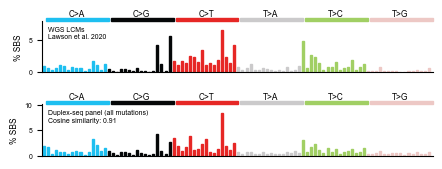

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(4.528, 1.812))
axs = axs.flatten()

# loop through profiles 
for i, signature in enumerate(profiles_dict.keys()):
    title = profiles_dict[signature]
    plot_signature(profiles[[signature]], axs[i], add_contexts=False, text = title,
                ttype = "Percentage")

plt.tight_layout()  
plt.savefig("plots/ExtendedFig2b_LCMs_lawson_vs_duplex_all_profiles.pdf", 
            dpi = 300, bbox_inches = 'tight')
plt.show()